# Advanced Classification Predict - AE6

##### Team Mates: Khuliso Muleka, Sbusiso Phakathi, Shanice Pillay and Seromo Podile

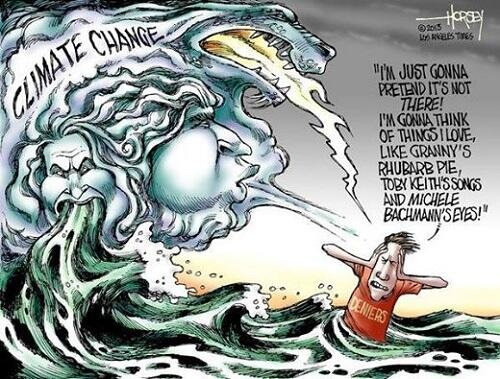!

# Table of Contents

1. Introduction
2. Problem Statement
3. Data Preprocessing and Cleaning
4. Explanatory Data Analysis
5. Building models with unsampled data
6. Unbalanced data
7. Conclusion

# 1. Introduction

Climate change is defined as a change in global climate patterns and attributed largely to the increased levels of atmospheric carbon dioxide produced by the use of fossil fuels. Such Changes could be manifested in form of change in precipitation , temperature and wind magnitudes.

As a result of the harsh aftermath created by climate change, more public and private corporations are working together to try and reduce the negative effects of climate change. Thus global sustainability and more environmentally- friendly projects are being favored. The task at the hand is to determine whether consumers see climate change as a real threat or not, in order to better understand that their target audience perspective on business product and services. 

In this notebook, we will be analyzing Twitter datasets using Machine learning Classification models.

# 2. Problem Statement


Build a machine learning classification model that determines whether or not a person believes in climate change or not based on their tweet.

# 3. Data Preprocessing and Cleaning 

## 3.1 Dataset 

The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes:

### Sentiment Description

2 - News: the tweet links to factual news about climate change 

1 - Pro: the tweet supports the belief of man-made climate change

0 - Neutral: the tweet neither supports nor refutes the belief of man-made climate change 

-1 - Anti: the tweet does not believe in man-made climate change 

### Variable Definitions


*   sentiment: Sentiment or class of tweet
*   message: Tweet text
*   tweetid: Twitter unique id code


## Comet
We will be using Comet as a form of version control throughout the development of our model

In [1]:
from comet_ml import Experiment

#pip install comet_ml

In [2]:

# Create an experiment with your api key

# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="MpO4LpB9MQYCpwSMctM8yvQCN",
    project_name="team-ae6",
    workspace="shanipillay",
)

#experiment = Experiment(api_key="4tkzu35HQsdtVizYgCkTOIJ2L",
                        #project_name="classification-ae6-dsft21", workspace="seromo", log_code=True)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/shanipillay/team-ae6/b8cd450a7288491288b19df2223691d2



## 3.2 Importing python libraries 

Python Libraries important functions that lessen the need for writing codes from scratch. There are multiple python libraries that exist and each function plays a vital role in developing machine learning, data science, data visualization, image and data manipulation applications. 

We will be using the below mentioned libraries.

In [3]:
# storing and analysis
import numpy as np
import pandas as pd
import re

# visualization
import matplotlib.pyplot as plt
import warnings
import nltk
import string
import seaborn as sns

#import text classification modules
import os
from nltk.tokenize import WordPunctTokenizer
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

from nltk.stem.porter import * 
from wordcloud import WordCloud
import spacy
from spacy import displacy
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer

# import train/test split module
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# import scoring metrice
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# suppress cell warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Standard libraries
import re
import csv
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

# Style
import matplotlib.style as style 
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
style.use('seaborn-poster')
from PIL import Image
from wordcloud import WordCloud

# Downloads
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# Preprocessing
from collections import Counter
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords, wordnet  
from sklearn.feature_extraction.text import CountVectorizer   
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Building classification models
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Model evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pilla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pilla\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pilla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pilla\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## 3.3 Load the dataset

We will be working with two datasets:
- train dataset
- test dataset

In [4]:
#Load the training set and testing set
train = pd.read_csv('train.csv') 
test = pd.read_csv('test_with_no_labels.csv') 
hashtag = pd.read_csv('train.csv') 

In [5]:
#display first 5 entries of the train data
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [6]:
#Display the first 5 entries of the test data
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


Through displaying the first 5 rows of the test and training data, we can already determine that there exists a lot of characters in the tweets will be deemed useless in the dataset. A further preprocesing of the dataset will get rid of the very common words, punctuation and more that can deem it difficult to train the model

In [7]:
#Print out the Shape of the training data and the testing data
print('Shape of Train Dataset:',train.shape)
print('Shape of Test Dataset:',test.shape)

Shape of Train Dataset: (15819, 3)
Shape of Test Dataset: (10546, 2)


The shape print out indicates that the train dataset has 15819 rows with 3 features, while the shape of the testing data indicates 10546 rows with 2 features. This makes sense. The training data contains our target variable, while the testing data will need a predicted target variable imputed in its dataset

In [8]:
#Use the value_counts() method to displace the count of each sentiment in the training dataset
train['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

Sentiment of class 1 seems to have the vast majority of the counts, with a total of 8530, with class 2, 0 and -1 having a 9640,2353, and 1296 value count respectively. This indicates that the data of class 1 far outweights that of the rest of the class, with class -1 having a significantly lower value count. This indicates that we may be dealing with class imbalance. Further investigation will support the hypothesis made

In [9]:
#Use the isnull() method to check for null values in training data
#.sum() method evaluates the total of each column of null values
train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

The training data set seems not to have any null values. This allows us to further preprocess the data to generate sufficient features for training the models

## 3.4 Data Preprocessing

In [10]:
#Combining both train and test data set before data cleaning as tweets in both the data set is unstructured
data = train.append(test, ignore_index=True) 


Before we perform sentiment analysis correctly, we need to preprocess and clean the original dataset first. Once we have performed data cleaning, we will move on to tokenize and stem every tweet, before we begin the exploratory data analysis phase.

We will perform the following data preprocessing techniques:
- remove twitter handles or mentions
- remove retweets and convert letters to lower case
- remove punctuation, special characters and numbers
- remove words less than 3 letters

### 3.4.1 Remove Twitter Handles or Mentions

Twitter handles or mentions are masked as @user due to concerns surrounding privacy. These twitter handles hardly give any information about the nature of the tweet therefore we remove them. 

### 3.4.2 Remove with Retweets and Convert Letters to Lower Case

A Retweet is a reshare of another twitter user's original tweet and starts with the RT with the original tweets in qoutes. Retweets do hold a significance in dataset as people who reshare other users tweets generally agree with that tweet statement. We will convert the tweets to lower case to analyse our data better and gain more insights.

### 3.4.3 Remove Punctuation, Special Characters and Numbers

Punctuation, special characters and numbers do influence the sentiment of a tweet. We will thus remove these from the tweet dataset

### 3.4.4 Removing short words

Words that have less than 3 letters generally do not contribute any value to the sentiment. Words like 'ohh' and 'lol' are unhelpful in sentiment analysis and will be removed.

In [11]:
def TweetCleaner(tweet):
   
    # Convert to lowercase
    tweet = tweet.lower() 
    
    # Remove mentions or twitter handles   
    tweet = re.sub('@[\w]*','',tweet)  
    
    # Remove url's
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)    
    
    # Remove numbers
    tweet = re.sub(r'\d+', '', tweet)  
    
    # Remove punctuation
    tweet = re.sub(r"[,.;':@#?!\&/$]+\ *", ' ', tweet)                  
    
    return tweet

# Clean the tweets in the message column
data['message'] = data['message'].apply(TweetCleaner)
data['message'] = data['message'].apply(TweetCleaner)

data.head()

,sentiment,message,tweetid
0,1.0,polyscimajor epa chief doesn t think carbon di...,625221
1,1.0,it s not like we lack evidence of anthropogeni...,126103
2,2.0,rt researchers say we have three years to act...,698562
3,1.0,wired was a pivotal year in the war on clima...,573736
4,1.0,rt it s and a racist sexist climate change d...,466954


### 3.4.8 Tokenization

Tokenization is the process of substituting a sensitive data element with a non-sensitive equivalent, referred to as a token, that has no extrinsic or exploitable meaning or value. The token is a reference (i.e. identifier) that maps back to the sensitive data through a tokenization system.

Tokenization is the process of tokenizing or splitting a string, text into a list of tokens. A token is a part of a word or a sentence or a paragraph.

In [12]:
#Use tokenization to the words into a list of tokens 
tokenized_tweet = data['message'].apply(lambda x: x.split()) 
tokenized_tweet.head()

0    [polyscimajor, epa, chief, doesn, t, think, ca...
1    [it, s, not, like, we, lack, evidence, of, ant...
2    [rt, researchers, say, we, have, three, years,...
3    [wired, was, a, pivotal, year, in, the, war, o...
4    [rt, it, s, and, a, racist, sexist, climate, c...
Name: message, dtype: object

### 3.4.9 Stemming

Stemming is the technique of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma. Stemming is important in natural language understanding (NLU) and natural language processing (NLP).

Stemming is a rule-based process of stripping the suffixes from a word.The goal is to remove word affixes (particularly suffixes) that modify meaning. It returns words in their root form and for ease of reference and understanding.

In [13]:
#Use PorterStemmer() to strip suffixes from the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer() 

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 
tokenized_tweet.head()

0    [polyscimajor, epa, chief, doesn, t, think, ca...
1    [it, s, not, like, we, lack, evid, of, anthrop...
2    [rt, research, say, we, have, three, year, to,...
3    [wire, wa, a, pivot, year, in, the, war, on, c...
4    [rt, it, s, and, a, racist, sexist, climat, ch...
Name: message, dtype: object

In [14]:
# bring the words back together 
for i in range(len(tokenized_tweet)): 
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i]) 

data['message'] = tokenized_tweet 

# 4. Explanatory Data Analysis

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

## 4.1 Sentiment Analysis

We will now split the data back to training set and test set in order to get the overall sentiment on climate change around the tweets we have in our training data

In [15]:
#Split the dataset back to the training set and the testing set
train = data[:len(train)] 
test = data[len(test):]  

In [16]:
#Check the number of rows and columns in the dataset
train.shape

(15819, 3)

Data has been cleaned in the 'message' feature.

### 4.1.1 Frequency distribution of sentiments

We will examine the amount of tweets each sentiment contains. 

In [17]:
#The frequency values of the individual sentiments
train['sentiment'].value_counts() 

 1.0    8530
 2.0    3640
 0.0    2353
-1.0    1296
Name: sentiment, dtype: int64

From the above we can see that data is extremely unevenly distributed. The strongest sentiment is the pro (1) climate change sentiment whereas the weakest sentiment is the anti (-1) climate change sentiment. 

The unbalanced data may change the performance of the classification model. Deeper analysis on each sentiment will need to be done to make final conclusions. 

### 4.1.2 Barplot and piechart

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally. We will create a visualization with the 4 sentiments below. 

A pie chart is a circular statistical graphic, which is divided into slices to illustrate numerical proportion. In a pie chart, the arc length of each slice, is proportional to the quantity it represents.

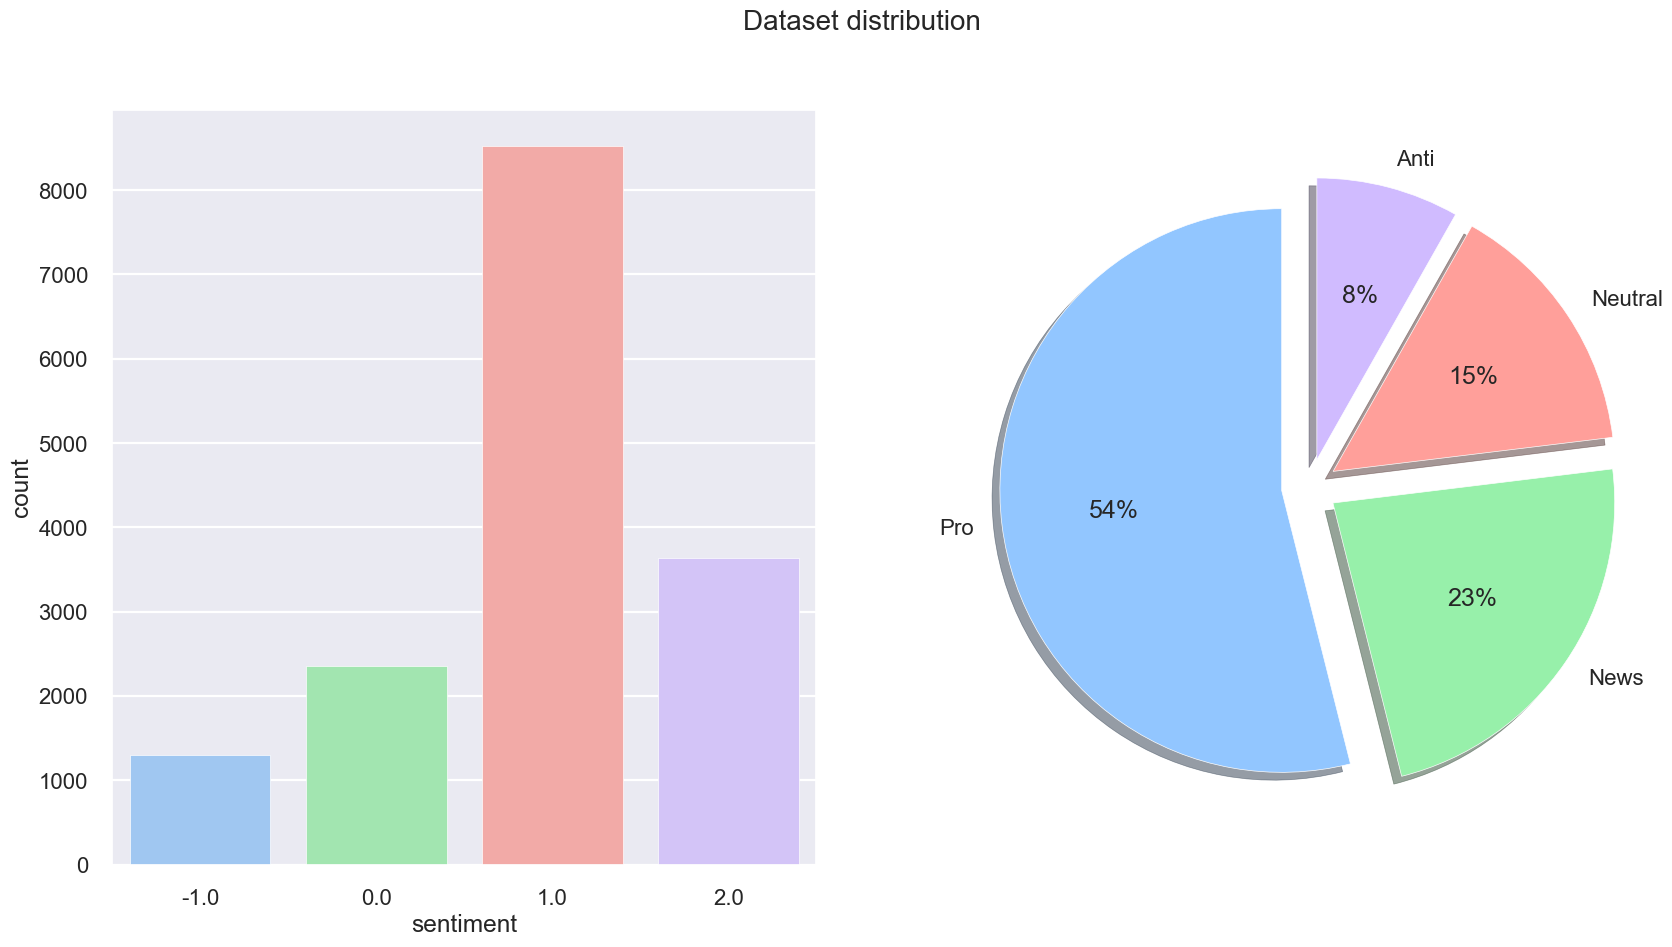

In [18]:
style.use('seaborn-pastel')

fig, axes = plt.subplots(ncols=2, 
                         nrows=1, 
                         figsize=(20, 10), 
                         dpi=100)

sns.countplot(train['sentiment'], ax=axes[0])

labels=['Pro', 'News', 'Neutral', 'Anti'] 

axes[1].pie(train['sentiment'].value_counts(),
            labels=labels,
            autopct='%1.0f%%',
            shadow=True,
            startangle=90,
            explode = (0.1, 0.1, 0.1, 0.1))

fig.suptitle('Dataset distribution', fontsize=20)
plt.show()

Conclusion:

Class 1 represents the biggest plot being the Pro Climate Change Sentiment of the dataset. 
Only a small margin of the data has a negative sentiment towards climate change.
Neutral tweets are the third biggest sentiment with News being the second largest sentiment. This includes a lot of news tweets from news twitter accounts and jounalists.


### 4.1.4 ViolinPlot

A violinplot is a method of ploting numerical data. It is similar to the boxplot with the addition of a rotated kernel density plot on each side. We will make a violin plot to display the distribution of the length of the tweets for each class in the training set

Text(0.5, 0, 'Sentiment Class')

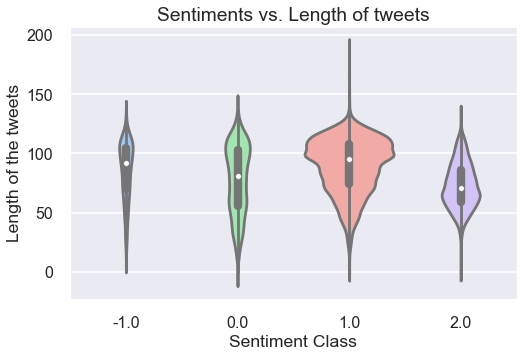

In [19]:
#create a new length value column that contains the lengths of the messages
train['message_length'] = train['message'].apply(len)

#Create a violinplot of the dataset
plt.figure(figsize=(8,5)) #Set the figsize to 8 and 5 respectively
plt.title('Sentiments vs. Length of tweets') #Add the title of the violin plot
sns.violinplot(x='sentiment', y='message_length', data=train,scale='count') #Add the dimentions of the violin plot
plt.ylabel("Length of the tweets") #Y_lable of the plot
plt.xlabel("Sentiment Class") #X_label of the plot

The facetgrid indicates the tweet length accross all sentiments are destributed around the 50-150 character length. All sentiments having a vast majority of the tweets being in that 100-150 range, indicating that most tweets are generally about climate change are longer in length. People sharing an experience or their thoughs around climate change

In [20]:
#Use groupby in order to numerically display what the boxplot is trying to show to the user
train['message_length'].groupby(train['sentiment']).describe()

,count,mean,std,min,25%,50%,75%,max
sentiment,,,,,,,,
-1.0,1296.0,86.058642,24.148120,11.0,70.0,92.0,105.0,133.0
0.0,2353.0,78.153421,28.750226,0.0,56.0,81.0,103.0,137.0
1.0,8530.0,89.730832,22.953587,0.0,74.0,95.0,108.0,189.0
2.0,3640.0,72.850549,19.070909,0.0,59.0,71.0,86.0,133.0


* Negative sentiments have most of their tweets between 114 and 140 with an average 123.7 length size of the tweets
* Neutral has an interquartile range around the 85 and 139 length, meaning neutral tweets very the most, which is confirmed by the largest standard deviation (std) of 32.36 as compared to the rest of the dataset
* Positive class has a intequartile range of 123 to 137, meaning most positive tweets are longer in length. The standard deviation is at 19.9, which is one of the shorter ones in the dataset meaning there is less variance
* News tweets have an interquartile range of 108 to 137 and has the smallest standard deviation of 19

## 4.2 Frequent words

### 4.2.1 Word cloud

We will look at the sentiment distribution of the train dataset by analyzing the common words using wordcloud visualization tools.

Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.

In [21]:
#Create strings for each class
positive_words =' '.join([text for text in data['message'][data['sentiment'] == 1]]) #Words in the positve class
negative_words = ' '.join([text for text in data['message'][data['sentiment'] == -1]]) #Words in negative class
normal_words =' '.join([text for text in data['message'][data['sentiment'] == 0]]) #Words in the neutral class
news_words =' '.join([text for text in data['message'][data['sentiment'] == 2]]) #Words in the news class

In [22]:
#Create a user defined function to display a word cloud for each class
def word_cloud(class_words):
   
    wordcloud = WordCloud(background_color='white',width=800, height=500, random_state=21, max_font_size=110).generate(class_words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title("Most Common words")
    plt.axis('off')
    return plt.show()

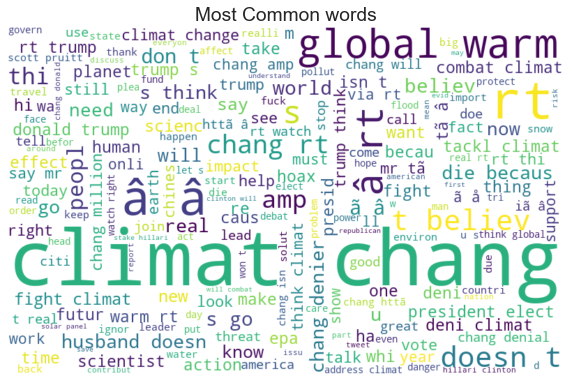

In [23]:
#Visualise all words from the positive class
word_cloud(positive_words)

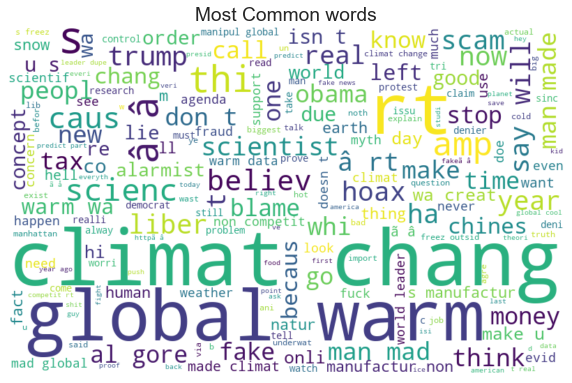

In [24]:
#Visualise all words from the negative class
word_cloud(negative_words)

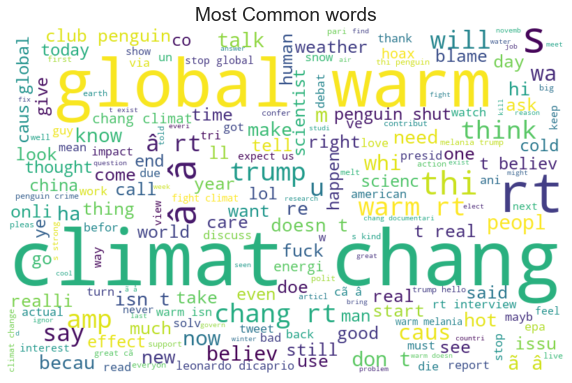

In [25]:
#Visualise all words from the neutral class
word_cloud(normal_words)

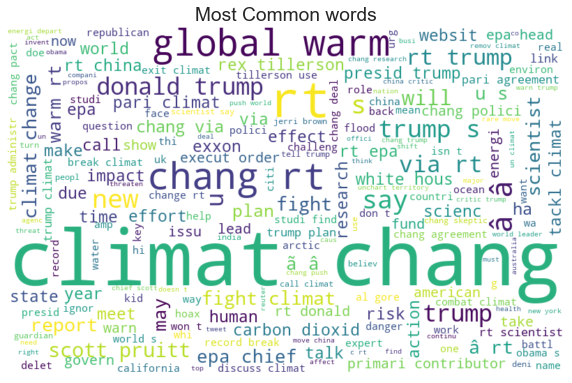

In [26]:
#Visualise all words from the news class
word_cloud(news_words)

*Pro* - The wordcloud suggests that most positive sentiments are global warming, climate change, believe climate, change real, tackle and the likes depicted in the wordcloud. A strong call for action, to fight climate change by a vast majority of the tweets and a vast majority of people tweeting to others to plea the reality of climate change.  'http' appears frequently as well indicating a lot of links present.

*Anti* - Most key words in the negative sentiments are very political and scientific, indicating words said by world leaders on the topic of climate change. Trump, a firm anti climate change individual is appearing very significantly, including the terms scientist, made, fake, alarmist which shows either a lot of people not believing that is real on a hunch or because of a lack of scientific evidence to support the claims. Words like scam, money, man-made indicate one of the reasons they may not really believe climate change.

*Neutral* - Topics around the effects on climate change as seen with words like 'talk','debate','report'. They are speaking about the penguins which are indangered due to the effects of climate change. They speak about the climate, weather, warm, polar bear. There also appears to be http, which suggests a lot of neutral tweets may have a link to an articles or journals.


*News* - Donald Trump and his views on climate change appear a lot here. They also report a vast majority of issues all included in the analysis of the other words included. US Administrator of Environmental Affairs is appearing regularly as well. There also is an 'http', which shows that news tweets may have a link to a news report. The word cloud is also indicating that the words are well distributed and spoken of almost similarly. Most of the words are not frequently requiring except 'Climate Change', 'Change HTTP', 'Warm HTTP', which are linked to tweets having links, and the main topic being thatn of global warming and climate change

## 4.2.2 Hashtag analysis

Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point in time. We should try to check whether these hashtags add any value to our sentiment analysis task, i.e., they help in distinguishing tweets into the different sentiments. The tweet seems positive in nature and the hashtags in the tweet convey the same feeling.

In [27]:
#Create a function to collect hashtags
def hashtag_extract(x):
    
    hashtags = [] 
    for i in x:   
        ht = re.findall(r"#(\w+)", i) 
        hashtags.append(ht)

    return hashtags

In [28]:
# extracting hashtags from the news
HT_news = hashtag_extract(hashtag['message'][hashtag['sentiment'] == 2])
# extracting hashtags from positive sentiments
HT_positive = hashtag_extract(hashtag['message'][hashtag['sentiment'] == 1])
# extract hashtags from neutral sentiments
HT_normal = hashtag_extract(hashtag['message'][hashtag['sentiment'] == 0])
# extracting hashtags from negative sentiments
HT_negative = hashtag_extract(hashtag['message'][hashtag['sentiment'] == -1])

# unnesting list of all sentiments
HT_news = sum(HT_news,[])
HT_positive = sum(HT_positive,[])
HT_normal = sum(HT_normal,[])
HT_negative = sum(HT_negative,[])

We will now create a frequency distribution of the top 10 hashtags for each of the individual classes to see what each hashtag represent for each class

In [29]:
#Create a function that visualises the barplot distribution of the hashtags
def bar_dist(x):
    
    a = nltk.FreqDist(x) 
    d = pd.DataFrame({'Hashtag': list(a.keys()), 
                  'Count': list(a.values())})  
    d = d.nlargest(columns="Count", n = 10)  
    plt.figure(figsize=(16,5))
    ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
    ax.set(ylabel = 'Count') 
    return plt.show()

### 4.2.2.1 News

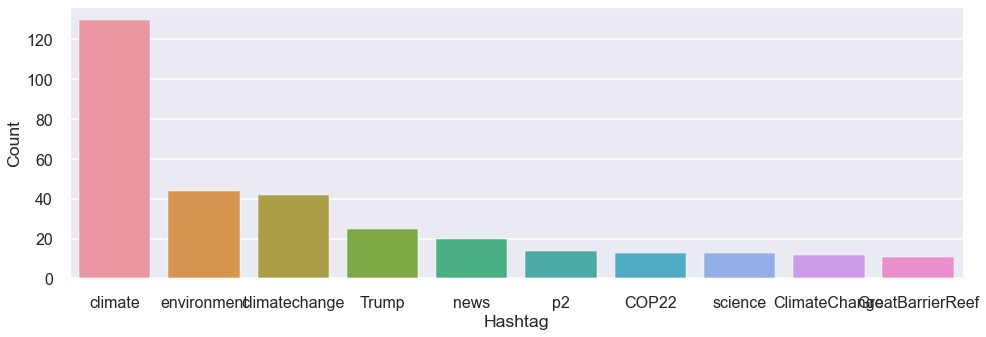

In [30]:
#Display barplot of the News hastags
bar_dist(HT_news)

As expected, the news is reporting on a vast nature of stories, mostly around the climate, climate change and the environment. Political events like Trump, congress of Parties (COP), Paris Agreements are also covered

### 4.2.2.2 Positive hashtags

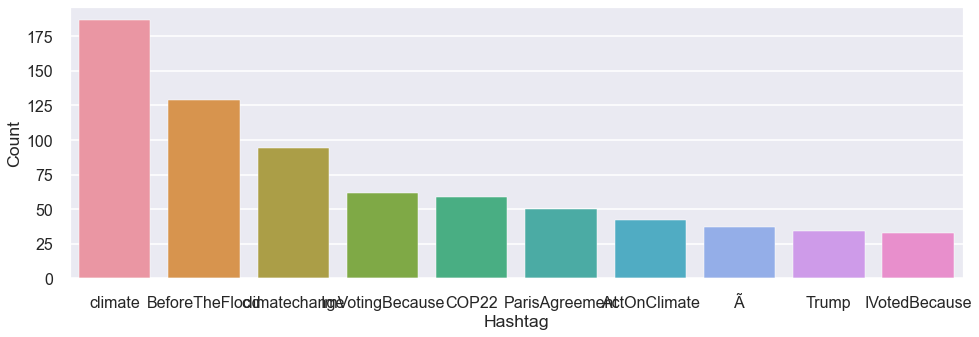

In [31]:
#Display barplot of the positive hastags
bar_dist(HT_positive)

We find an interesting understanding from this graph. As expected climate is the number one positive key hashtags but what is interesting is number 2, and why Leonardo diCaprio was mentioned on the Wordcloud. Before The Flood is a documentary starring actor Leonardo diCaprio spealing with a lot of activists, scientists and world leaders to discuss climate change and possible solutions. It has clearly had a fantasic response to viewers who have expressed positive feedbank, which proves our assumption that a lot of people need more research and knowledge to believe climate change since seeing is believing. Organisations globally can get involved in similar initiatives which can change the sentiment around climate change. The rest of the positive hashtags come from tweeting about the Conference of Parties (cop) which is a mkeeting by the United nations to discuss climate change.

### 4.2.2.3 Neutral hashtags

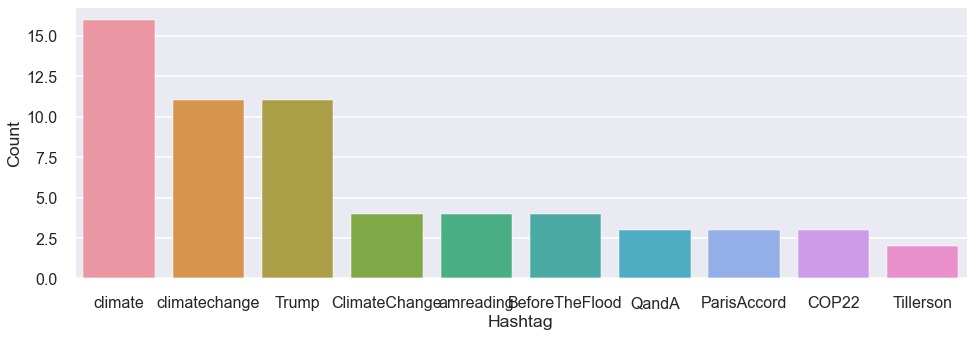

In [32]:
#Display barplot of the neutral hastags
bar_dist(HT_normal)

Climate change and climate are again top of the list, but interestingly enough we start to see the emergance of Trump tweets. Which is driving up the neutrals. We also see the Before The Flood series which our COP, which makes sense since neutrals do question a lot initially and finally the #QandA, which shows a lot of neutral sentiments in the data are questions. We do however notice that the count values of each hashtag is significantly lower than the positive hashtags and the new hashtags

### 4.2.2.4 Negative Hashtags

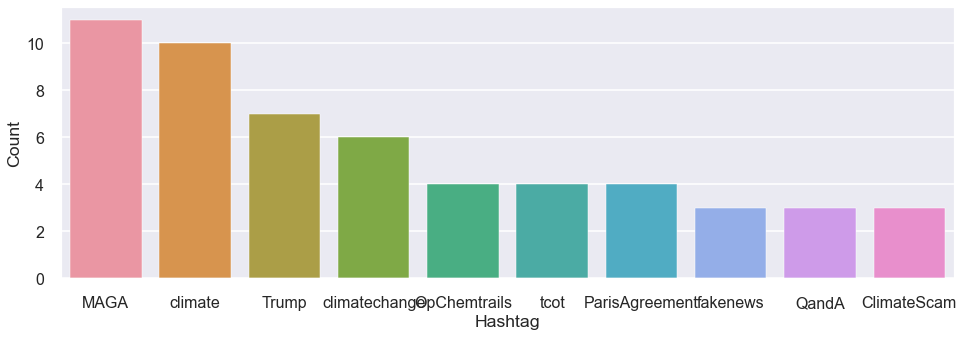

In [33]:
#Display barplot of the neutral hastags
bar_dist(HT_negative)

The number one negative sentiment from the nagative tweets comes from the Make America Great Again campaign by US President Donald Trump. Possibly this indicates all the negative sentiments he has against Climate Change.

# 5. Model Building with cleaned data

To analyze a preprocessed data, it needs to be converted into features. Depending upon the usage, text features can be constructed using assorted techniques – Bag-of-Words, TF-IDF vecotoriser. We will thus investigate both feature creation models and select the best model base on merits

## 5.1 Splitting the data

We need to split the data, into training features and training target variables to fit and train the model. 

In [34]:
#Splitting features and target variables
X = train['message'] 
y = train['sentiment']    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12655,)
(3164,)
(12655,)
(3164,)


The X_train and y_train both have 12655 values, which is 80% of our data, and the X_test and y_test which represents out test data is being 20% of our data which will give us an indication of our accuracy

## 5.2 Feature Extraction

Text feature extraction is the process of transforming what is essentially a list of words into a feature set that is usable by a classifier. The NLTK classifiers expect dict style feature sets, so we must therefore transform our text into a dict. 

## 5.2.1 TF-IDF Features

This method which is based on the frequency method but it is different to the bag-of-words approach in the sense that it takes into account, not just the occurrence of a word in a single document (or tweet) but in the entire corpus.

TF-IDF works by penalizing the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents.

Let’s have a look at the important terms related to TF-IDF:

TF = (Number of times term t appears in a document)/(Number of terms in the document)
IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.
TF-IDF = TF*IDF

In [35]:
# import and call the TFidfVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf = TfidfVectorizer() 


## 5.2.2 Bag of words features

Bag-of-Words is a method to represent text into numerical features. Consider a corpus (a collection of texts) called C of D documents {d1,d2…..dD} and N unique tokens extracted out of the corpus C. The N tokens (words) will form a list, and the size of the bag-of-words matrix M will be given by D X N. Each row in the matrix M contains the frequency of tokens in document D(i).

In [36]:
#import CountVectorizer and call it
from sklearn.feature_extraction.text import CountVectorizer 

cf= CountVectorizer() 

## 5.3 Models using TF-IDF

In building a model using TF-IDF vectorizer we have to build a pipeline that contains both the feature extractor called in this case the TF_IDF vectorizer and fit it to a model. We will the evaluate the metrics of the data and see what could be the best performing model

In [37]:
#Import metrics from sklearn
from sklearn import metrics

## 6. Unbalanced data

Class imbalance exists if the data is not evenly distributed. The model is this difficult to train when there are classes that are vastly smaller than other classes. So we will look to at least have a dataset that is more evently distributed to get better results. This is called the resampling of the dataset

### 6.1 Resampling of the dataset

Resampling of the dataset can be done in one or two ways:

- **Downsampling** - taking a random subset of the majority class small enough to match the number of observations in the minority class.

- **Upsampling** - taking repeated random samples from the minority class until we have as many observations as the  majority class. This grows the size of the minority class by effectively duplicating observations at random.

For this model, we will do it for both ways

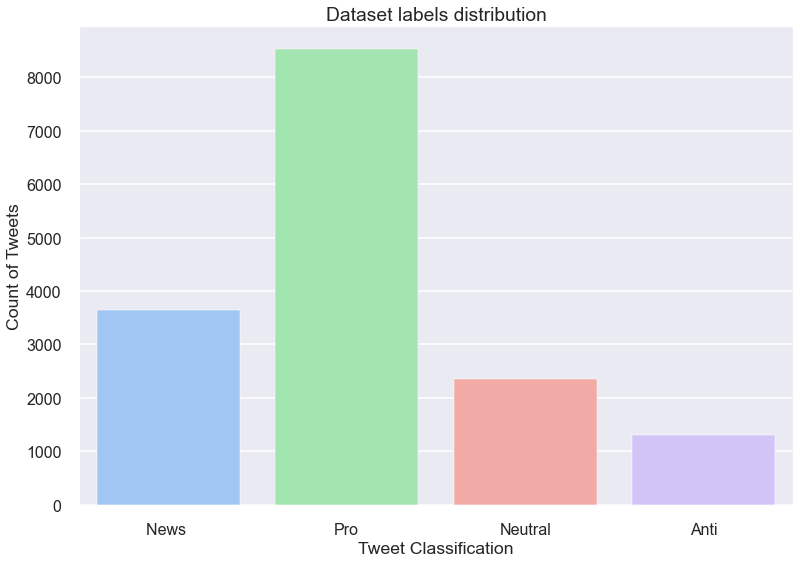

In [38]:
#Create a barplot for the train dataset classes
News = train['sentiment'].value_counts()[2] 
Pro= train['sentiment'].value_counts()[1]   
Neutral=train['sentiment'].value_counts()[0]
Anti=train['sentiment'].value_counts()[-1]  

sns.barplot(['News ','Pro','Neutral','Anti'],[News,Pro,Neutral,Anti]) 
plt.xlabel('Tweet Classification') 
plt.ylabel('Count of Tweets')      
plt.title('Dataset labels distribution') 
plt.show() 

If we refer back to this barplot, we can see that the data is not balanced. We will be looking to upscale the minority calsses which is the news class, neutral class and anti class and downsample the big majority class. we will look at different values that work the best to improve the model accurancy and f1-scores

In [39]:
#Import the resampling module
from sklearn.utils import resample

We will look to distinguish which classes are minority classes and which are majority classes and then downsample and upsample accoringly to make the classes balance

In [40]:
#Downsample and upsample train dataset

X = train['message']
y = train['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

df_upsampled_train = pd.DataFrame({'message': X_train, 'sentiment': y_train})


df_majority = train[train.sentiment==1] 
df_minority = train[train.sentiment==0] 
df_minority1 = train[train.sentiment==2] 
df_minority2 = train[train.sentiment==-1]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    
                                 n_samples=5000,     
                                 random_state=123) 
#Upsampling the least minority class
df_minority_up = resample(df_minority, 
                        replace=True,   
                        n_samples=5000,     
                        random_state=123) 

df_minority_up1 = resample(df_minority1, 
                        replace=True,    
                        n_samples=5000,     
                        random_state=123) 

df_minority_up2 = resample(df_minority2, 
                        replace=True,   
                        n_samples=5000,    
                        random_state=123) 

# Combine minority class with downsampled majority class
df_resampled = pd.concat([df_majority_downsampled,df_minority_up,df_minority_up1, df_minority_up2])
 
# Display new class counts
df_resampled.sentiment.value_counts()

y_train = df_upsampled_train['sentiment']
X_train = df_upsampled_train['message']

We have created a new balanced dataset with 5000 entries for each of the classes. We will now investigate training on the new balanced dataset

## 6.1 Splitting the resampled data

In [41]:
#X = df_resampled['message']
#y = df_resampled['sentiment']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12655,)
(3164,)
(12655,)
(3164,)


The training features seem slightly more, but more rounded since we now have a balance dataset. We will now evalue the model perfomance of the dataset

## 6.2 Model building using resampled data

Building classification models¶

We will be making use of a pipeline to build our classification models. This pipeline will vectorize the text data before fitting it to our chosen model.

The following 5 models will be considered:

1. Random forest
2. Naive Bayes
3. K nearest neighbors
4. Logistic regression
5. Linear SVC

Pipelines The pipelines consist of 2 steps, vectorization and model fitting.

Machines, unlike humans, cannot understand the raw text. Machines can only see numbers. Particularly, statistical techniques such as machine learning can only deal with numbers. Therefore, we need to convert our text into numbers.

The TFIDF vectorizer assigns word frequency scores that try to highlight words that are more interesting, e.g. frequent in a document but not across documents. The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents. Another advantage of this method is that the resulting vectors are already scaled.

In [42]:
# Random Forest Classifier
rf = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', RandomForestClassifier(max_depth=5, 
                                              n_estimators=100))])

# Naïve Bayes:
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB())])

# K-NN Classifier
knn = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', KNeighborsClassifier(n_neighbors=5, 
                                             metric='minkowski', 
                                             p=2))])

# Logistic Regression
lr = Pipeline([('tfidf',TfidfVectorizer()),
               ('clf',LogisticRegression(C=1, 
                                         class_weight='balanced', 
                                         max_iter=1000))])
# Linear SVC:
lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                 ('clf', LinearSVC(class_weight='balanced'))])

Train the models

The models are trained by passing the train data through each custom pipeline. The trained models are then used to predict the classes.

In [43]:
# Random forest 
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Niave bayes
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# K - nearest neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Linear regression
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Linear SVC
lsvc.fit(X_train, y_train)
y_pred_lsvc = lsvc.predict(X_test)

COMET ERROR: Failed to extract parameters from estimator


Model evaluation

The performance of each model will be evaluated based on the precision, accuracy and F1 score achieved when the model is used to predict the classes for the validation data. We will be looking at the following to determine and visualize these metrics:

- Classification report
- Confusion matrix
- The best model will be selected based on the weighted F1 score.

##### Random forest classification

Random Forest is a tree-based machine learning algorithm that leverages the power of multiple decision trees for making decisions. As the name suggests, it is a “forest” of trees!

The following diagram is a visual representation of the random forest classification method:

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       278
         0.0       0.00      0.00      0.00       425
         1.0       0.55      1.00      0.71      1755
         2.0       0.00      0.00      0.00       706

    accuracy                           0.55      3164
   macro avg       0.14      0.25      0.18      3164
weighted avg       0.31      0.55      0.40      3164

accuracy 0.554677623261694
f1_score 0.39579557992448583


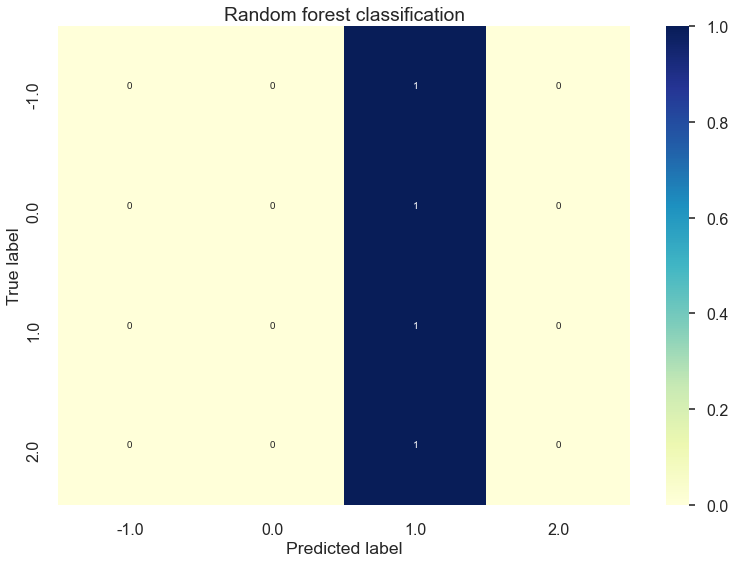

In [44]:
# Generate a classification Report for the random forest model
print(metrics.classification_report(y_test, y_pred_rf))
print('accuracy %s' % accuracy_score(y_pred_rf, y_test)) 
print('f1_score %s' % metrics.f1_score(y_test,y_pred_rf,average='weighted'))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=rf.classes_, 
            yticklabels=rf.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})

# Adding headings and lables
plt.title('Random forest classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Observations:
- From the confusion matrix above we notice that the random forest classification model does a very poor job on our data set. The model classifies all the tweets as pro climate change tweets.
- This results in precision, recall and F1 scores of zero for the anti, neutral and news classes.
- Tree based classification models are especially vulnerable to overfitting when the train data is imbalanced which is the case with our data. The model could be greatly improved by using resampling techniques such as oversampling the anti class and/or undersampling the pro class. This will allow the model to learn how to classify each class equally, improving its accuracy.
- The overall F1 score is 0.55. This is a relatively high score for a model that simply classifies all tweets into a single class. This score could only be achieved since the majority of the tweets are in fact pro climate change.

#### Naive Bayes classification

Naive Bayes is a classification algorithm that uses the principle of Bayes theorem to make classifications and assumes independent variables to be statistically independent from each other .

Bayes Theorem:

P(A∣B)=P(B∣A)∗P(A)P(B)
 
P(A|B) is the posterior probability of class (A, target) given predictor (B, attributes).

P(A) is the prior probability of class.

P(B|A) is the likelihood which is the probability of the predictor given class.

P(B) is the prior probability of the predictor.

Naive Bayes has 3 Classification Methods

Gaussian : It is used in classification and it assumes that features follow a normal distribution.

Bernoulli : The binomial model is useful if your feature vectors are binary (i.e. zeros and ones). One application would be text classification with a ‘bag of words’ model where the 1s & 0s are “word occurs in the document” and “word does not occur in the document” respectively.

Multinomial : It is used for discrete counts. For example, let’s say, we have a text classification problem. Here we can consider Bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.

We will be using the multinomial method

              precision    recall  f1-score   support

        -1.0       0.50      0.00      0.01       278
         0.0       0.84      0.06      0.11       425
         1.0       0.62      0.98      0.76      1755
         2.0       0.88      0.46      0.60       706

    accuracy                           0.65      3164
   macro avg       0.71      0.38      0.37      3164
weighted avg       0.70      0.65      0.57      3164

accuracy 0.6539190897597977
f1_score 0.5720741669956437


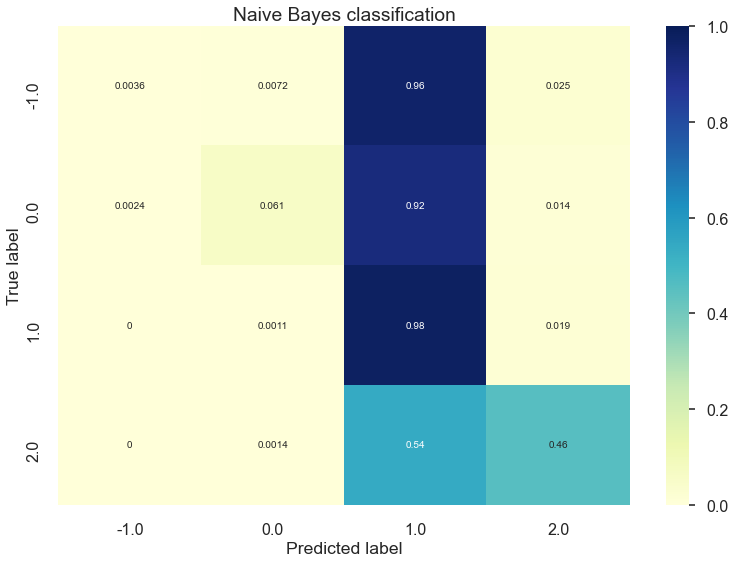

In [45]:
# Generate a classification Report for the Naive Bayes model
print(metrics.classification_report(y_test, y_pred_nb))
print('accuracy %s' % accuracy_score(y_pred_nb, y_test)) 
print('f1_score %s' % metrics.f1_score(y_test,y_pred_nb,average='weighted'))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=nb.classes_, 
            yticklabels=nb.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})

# Adding headings and lables
plt.title('Naive Bayes classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Observations:
- Although the Naive Bayes model is a slight improvement on the random forest model it still performs poorly
- This model classifies most tweets as pro climate change with improved predictions for the news class.
- The precision, accuracy and F1 scores have improved significantly for the news class but remain low for neutral and anti.
- The overall F1 score is 0.63. Again this score could only be achieved since the majority of tweets are in fact pro climate change.

#### K Nearest Neighbors classification
The KNN algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set.

There are various methods for calculating how closely the new datapoint resembles the points in the training set, of which the most commonly known methods are – Euclidian, Manhattan (for continuous) and Hamming distance (for categorical).

New datapoint( Ci ) and multi-classes {1,2,3}.

KNN Classifier would use one of the distance criteria to classify the new datapoint class

              precision    recall  f1-score   support

        -1.0       0.79      0.11      0.20       278
         0.0       0.72      0.12      0.20       425
         1.0       0.90      0.21      0.34      1755
         2.0       0.26      0.97      0.41       706

    accuracy                           0.36      3164
   macro avg       0.67      0.35      0.29      3164
weighted avg       0.73      0.36      0.32      3164

accuracy 0.356826801517067
f1_score 0.3229495989927983


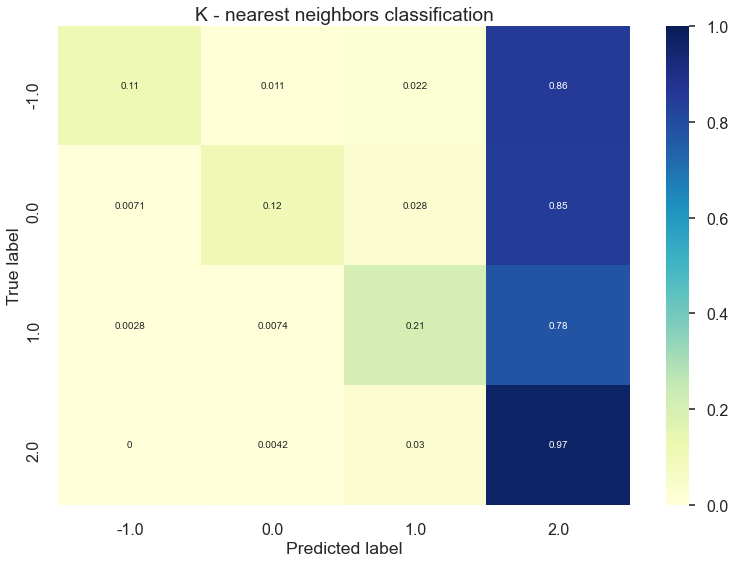

In [46]:
# Generate a classification Report for the K-nearest neighbors model
print(metrics.classification_report(y_test, y_pred_knn))
print('accuracy %s' % accuracy_score(y_pred_knn, y_test)) 
print('f1_score %s' % metrics.f1_score(y_test,y_pred_knn,average='weighted'))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=knn.classes_, 
            yticklabels=knn.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})

# Adding headings and lables
plt.title('K - nearest neighbors classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Observations:
- KNN is able to successfully classify the tweets.
- This model also classifies most tweets as pro climate change but to a smaller degree compared to the previous 2 models.
- The precision, accuracy and F1 scores have improved significantly for the pro, anti and neutral classes.
- There is a drop in the F1 score for the pro climate change class as the predictions become more balanced.
- The overall F1 score is 0.69 which is very close to our target but not there yet... The search continues.

### Logistic regression classification
Logistic Regression uses the probability of a data point to belonging to a certain class to classify each datapoint to it's best estimated class

Logistic regression has been rated as the best performing model for linearly separable data especially if it's predicting binary data(Yes & NO or 1 & 0), and performs better when there's no class imbalance.

The figure below is the sigmoid function logistic regression models use to make predictions:

              precision    recall  f1-score   support

        -1.0       0.48      0.64      0.55       278
         0.0       0.42      0.57      0.49       425
         1.0       0.86      0.65      0.74      1755
         2.0       0.67      0.83      0.74       706

    accuracy                           0.68      3164
   macro avg       0.61      0.67      0.63      3164
weighted avg       0.72      0.68      0.69      3164

accuracy 0.6801517067003793
f1_score 0.6891243090370149


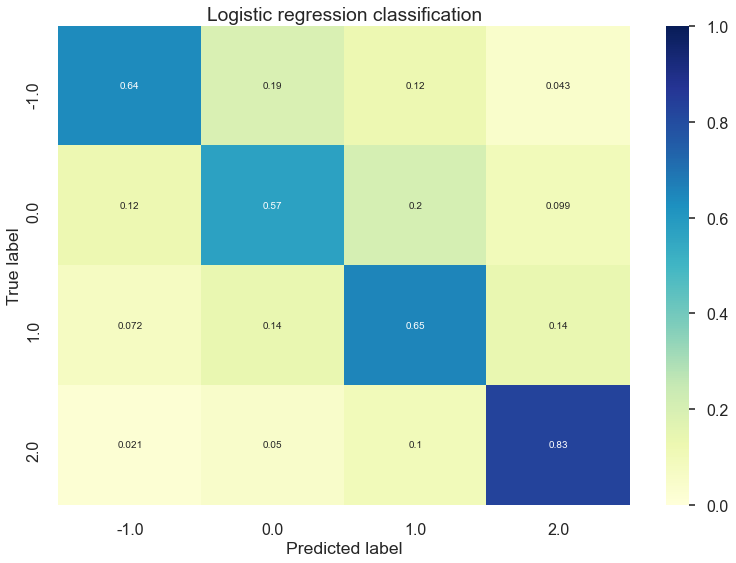

In [47]:
# Generate a classification Report for the model
print(metrics.classification_report(y_test, y_pred_lr))
print('accuracy %s' % accuracy_score(y_pred_lr, y_test)) 
print('f1_score %s' % metrics.f1_score(y_test,y_pred_lr,average='weighted'))

cm = confusion_matrix(y_test, y_pred_lr)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=lr.classes_, 
            yticklabels=lr.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})

# Adding headings and lables
plt.title('Logistic regression classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Observations:

- Logistic regression is able to successfully classify the tweets.
- This model classifies most tweets successfully with clear boundaries and less confusion surrounding the pro climate change class.
- The precision, accuracy and F1 scores have improved significantly for the pro, anti and neutral classes.
- There is a drop in the F1 score for the pro climate change class as the predictions become more balanced.
- The overall F1 score is 0.71 which is on target. Let's see if we can improve.

### Linear SVC classification
In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. The goal of the SVM algorithm is to create the best line or decision boundary that can seperate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors. Consider the below diagram in which there are two different categories that are classified using a decision boundary or hyperplane:

              precision    recall  f1-score   support

        -1.0       0.52      0.53      0.52       278
         0.0       0.45      0.48      0.47       425
         1.0       0.80      0.76      0.78      1755
         2.0       0.71      0.76      0.74       706

    accuracy                           0.70      3164
   macro avg       0.62      0.63      0.63      3164
weighted avg       0.71      0.70      0.70      3164

accuracy 0.7019595448798989
f1_score 0.7040492608468198


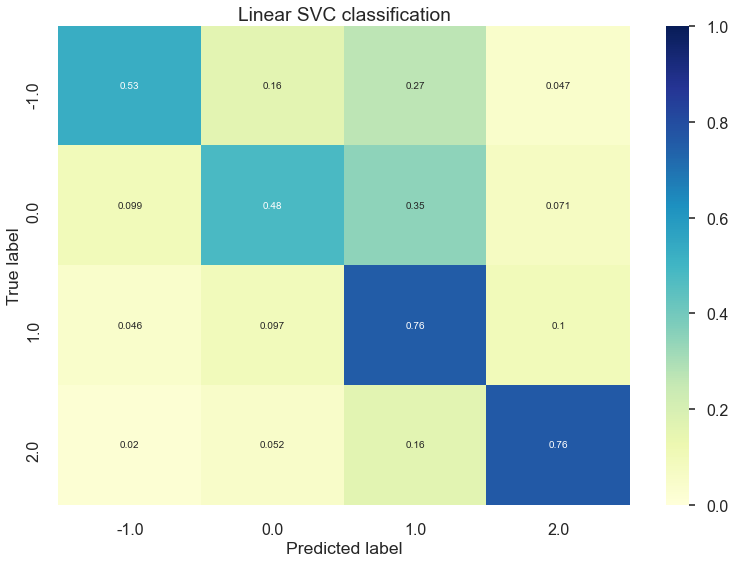

In [48]:
# Generate a classification Report for the linear SVC model
print(metrics.classification_report(y_test, y_pred_lsvc))
print('accuracy %s' % accuracy_score(y_pred_lsvc, y_test)) 
print('f1_score %s' % metrics.f1_score(y_test,y_pred_lsvc,average='weighted'))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_test, y_pred_lsvc)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=lsvc.classes_, 
            yticklabels=lsvc.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})

# Adding headings and lables
plt.title('Linear SVC classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Observations:

- Linear SVC is able to successfully classify the tweets.
- This model classifies most tweets successfully with clear boundaries and less confusion surrounding the pro climate change class compared to the first 3 models.
- This model shows a higher degree of confusion surrounding the pro class compared to logistic regression.
- This, however, leads to an increase in the precision, accuracy and f1 score for the pro class which makes up the majority of the tweets.
- Linear SVC has achieved the highest F1 score of 0.74

### Model Selection

Linear SVC has achieved the highest F1 score of 0.74 and is therefore our model of choice moving forward.

### Hyperparameter tuning

Once our top performing model has been selected, we attempt to improve it by performing some hyperparameter tuning.
After the optimal parameters are determined the linear SVC model is retrained using these parameters, resulting in a 3% increase in the F1 score.

In [49]:
from sklearn.model_selection import GridSearchCV

parameters_svm = {'tfidf__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False),'clf__C': (0.001, 0.01, 0.1, 1)}
gs_clf = GridSearchCV(lsvc, parameters_svm, n_jobs=-1)
gs_clf = gs_clf.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(gs_clf.best_score_))
print("Best parameters: ", gs_clf.best_params_)

Best cross-validation score: 0.74
Best parameters:  {'clf__C': 1, 'tfidf__ngram_range': (1, 2), 'tfidf__use_idf': True}


In [50]:
# This code is intentionally commented out - Code takes >10 minutes to run. 

"""
# Set ranges for the parameters that we want to tune
params = {'clf__C': [0.1, 0.2, 0.3, 0.4, 0.5],
          'tfidf__ngram_range' : [(1,1),(1,2)],
          'clf__max_iter': [1500, 2000, 2500, 3000],
          'tfidf__min_df': [2, 3, 4],
          'tfidf__max_df': [0.8, 0.9]}

# Perform randomized search & extract the optimal parameters
Randomized = RandomizedSearchCV(text_clf_lsvc, param_distributions=params, cv=5, scoring='accuracy', n_iter=5, random_state=42)
Randomized.fit(X_train,y_train)
Randomized.best_estimator_
"""

from sklearn.model_selection import GridSearchCV

# Retrain linear SVC using optimal hyperparameters:
lsvc_op = Pipeline([('tfidf', TfidfVectorizer(max_df=0.8,
                                                    min_df=2,
                                                    ngram_range=(1,2))),
                  ('clf', LinearSVC(C=0.3,
                                    class_weight='balanced',
                                    max_iter=3000))])

# Fit and predict
lsvc_op = GridSearchCV(lsvc, parameters_svm, n_jobs=-1)
lsvc_op.fit(X_train, y_train)
y_pred = lsvc_op.predict(X_test)
print("Best cross-validation score: {:.2f}".format(gs_clf.best_score_))
print("Best parameters: ", gs_clf.best_params_)
print('F1 score improved by',
      round(100*((metrics.accuracy_score(y_pred, y_test) - metrics.accuracy_score(y_pred_lsvc, y_test)) /metrics.accuracy_score(y_pred_lsvc, y_test)),0), 
      '%')
print('Old f1_score %s' % metrics.f1_score(y_test,y_pred_lsvc,average='weighted'))
print('New F1 score %s' % metrics.f1_score(y_pred, y_test,average='weighted'))


Best cross-validation score: 0.74
Best parameters:  {'clf__C': 1, 'tfidf__ngram_range': (1, 2), 'tfidf__use_idf': True}
F1 score improved by 7.0 %
Old f1_score 0.7040492608468198
New F1 score 0.7559060165399226


### End of Comet experiment

In [51]:

# Saving each metric to add to a dictionary for logging
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Create dictionaries for the data we want to log          
metrics = {"f1": f1,
           "recall": recall,
           "precision": precision}

params= {'classifier': 'linear SVC',
         'max_df': 0.8,
         'min_df': 2,
         'ngram_range': '(1,2)',
         'vectorizer': 'Tfidf',
         'scaling': 'no',
         'resampling': 'no',
         'test_train random state': '0'}
  
# Log info on comet
experiment.log_metrics(metrics)
experiment.log_parameters(params)

# End experiment
experiment.end()

# Display results on comet page
experiment.display()


COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/shanipillay/team-ae6/b8cd450a7288491288b19df2223691d2
COMET INFO:   Metrics:
COMET INFO:     f1        : 0.7421976497053365
COMET INFO:     precision : 0.7400496976395095
COMET INFO:     recall    : 0.7490518331226296
COMET INFO:   Parameters:
COMET INFO:     C                                 : 1.0
COMET INFO:     algorithm                         : auto
COMET INFO:     alpha                             : 1.0
COMET INFO:     bootstrap                         : True
COMET INFO:     ccp_alpha                         : 1
COMET INFO:     class_prior                       : 1
COMET INFO:     class_weight                      : balanced
COMET INFO:     classifier                        : linear SVC
COMET INFO:     clf                               : Lin

COMET INFO:     fit_prior                         : True
COMET INFO:     intercept_scaling                 : 1
COMET INFO:     leaf_size                         : 30
COMET INFO:     loss                              : squared_hinge
COMET INFO:     max_depth                         : 5
COMET INFO:     max_df                            : 0.8
COMET INFO:     max_features                      : auto
COMET INFO:     max_iter                          : 1000
COMET INFO:     max_leaf_nodes                    : 1
COMET INFO:     max_samples                       : 1
COMET INFO:     memory                            : 1
COMET INFO:     metric                            : minkowski
COMET INFO:     metric_params                     : 1
COMET INFO:     min_df                            : 2
COMET INFO:     min_impurity_decrease             : 1
COMET INFO:     min_impurity_split                : 1
COMET INFO:     min_samples_leaf                  : 1
COMET INFO:     min_samples_split                 

In [52]:
# Kaggle submission
test_x = test['message'] 

y_pred = lsvc_op.predict(test_x) 

test['sentiment'] = y_pred 
test['sentiment'] = test['sentiment'].astype(int)
test[['tweetid', 'sentiment']].to_csv('final5.csv', index=False)


# 7. Conclusion

In order to produce realiable results we had to remove any 'noise' in the data through data cleaning to build the best machine learning classifier model.

After data cleaning and pre-processing we have come to a conclusion that the Linear SVC model has perfomed best when the balanced data was used. 

Sentiment analysis - Pro Tweets are generally longer in length, Anti sentiment is fairly centered around politics, mostly mentioning the Trump Make America Great Again campaign, both neutral and news sentiment have high interaction with reference to scholar articles and journals. 

Accuracy score can be misleading when evaluating imbalanced datasets as it is not the best measure of prediction.

Given more time, more models such as deep learning neutral network models would have been used and to determine if our accuracy score and F1 score would yeild better results.